In [3]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np

In [4]:
df_activity = pd.read_csv('activity_data.csv')
df_activity.head()

,UserId,DateOfActivityPST,ActivityCount
0,241710509395,2019-09-24,29
1,241710509395,2020-09-11,60
2,435228414681,2018-01-06,12
3,435228414681,2018-04-20,20
4,435228414681,2018-05-10,136


In [5]:
df_email = pd.read_csv('email_data.csv')
df_email.head()

,LogId,EmailSentDateTimeUtc,EmailCampaignId,EmailOpenedDateTimeUtc,EmailClickedDateTimeUtc,UserId,ZipCode,AddressData
0,208728980120,2019-07-31 15:13:25.817,792229022220,NaN,NaN,851332105693,NaN,NaN
1,292563123584,2019-08-02 02:15:52.447,866429603262,2019-08-02 15:16:01.7533333,NaN,369293054977,NaN,NaN
2,72552047640,2019-08-07 16:21:37.293,383130475294,NaN,NaN,938684493058,NaN,NaN
3,1089121462891,2019-08-07 16:38:03.323,792229022220,NaN,NaN,50233193142,NaN,NaN
4,828770719378,2019-08-12 11:45:43.293,479810600058,NaN,NaN,369293054977,NaN,NaN


# Question 1: 

## How many rows are there in the two datasets

In [17]:
count_row_activity = df_activity.shape[0] #number of rows in the activity_data dataset
print("There are " + str(count_row_activity) + " rows in the activity_data dataset")

There are 4559973 rows in the activity_data dataset


In [18]:
count_row_email = df_email.shape[0] #number of rows in the email_data dataset
print("There are " + str(count_row_email) + " rows in the email_data dataset")

There are 474163 rows in the email_data dataset


## Number of emails sent 

In [19]:
number_emails = len(df_email['LogId']) #total log of emails
print("There were " + str(number_emails) + " emails sent over this period")

There were 474163 emails sent over this period


In [20]:
total_num_emails = (number_emails / 0.03)
print("The total number of emails sent is " + str(round(total_num_emails,0))[0:8])

The total number of emails sent is 15805433


# Question 2

## Earliest and most recent dates of emails sent in this dataset in California time (Pacific Standard Time Zone)?

In [21]:
from datetime import datetime

### Earliest

In [22]:
earliest = df_email['EmailSentDateTimeUtc'].min() #extract the earliest date 

In [23]:
earliest = datetime.strptime(earliest, '%Y-%m-%d %H:%M:%S.%f') #converting a string to a Date type  
earliest = pd.to_datetime(earliest, format= '%Y-%m-%d %H:%M:%S.%f').strftime('%m-%d-%Y %H:%M')
print("The earliest date of emails sent in this dataset is " + earliest + " (PCT)")

The earliest date of emails sent in this dataset is 01-04-2018 04:29 (PCT)


### Most recent 

In [24]:
most_recent = df_email['EmailSentDateTimeUtc'].max() #extract the latest date

In [25]:
most_recent = datetime.strptime(most_recent, '%Y-%m-%d %H:%M:%S.%f') #Converting a string to a Date format 
most_recent = pd.to_datetime(most_recent, format= '%Y-%m-%d %H:%M:%S.%f').strftime('%m-%d-%Y %H:%M')
print("The most recent date of emails sent in this dataset is " + most_recent + " (PCT)")

The most recent date of emails sent in this dataset is 04-19-2021 13:45 (PCT)


# Question 3

## 10 zip codes that received the most emails and how many emails they received

In [29]:
df_zc = df_email.groupby(['ZipCode']).count()['EmailCampaignId'].reset_index().sort_values(by= 'EmailCampaignId', ascending = False).head(10).reset_index(drop=True)

In [30]:
df_zc.rename(columns = {'EmailCampaignId':'#Emails'})

,ZipCode,#Emails
0,63301.0,312
1,33801.0,310
2,34210.0,299
3,38301.0,295
4,67460.0,285
5,95971.0,277
6,42301.0,266
7,36104.0,254
8,40769.0,234
9,85225.0,229


# Question 4

## Plot two lines on a single graph.

### Total distinct users who were sent at least 1 email by month and year.

In [8]:
df_email["new_date"] = 0 #creating a new column in the dataset corresponding to the date in format "Year-month" 

In [9]:
for d in range(len(df_email["EmailSentDateTimeUtc"])):
    df_email["new_date"][d] = df_email["EmailSentDateTimeUtc"][d][0:7]

/tmp/ipykernel_57/240894016.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_email["new_date"][d] = df_email["EmailSentDateTimeUtc"][d][0:7]


In [11]:
df_distinct = df_email.groupby(["new_date","UserId"]).count().reset_index().groupby("new_date").count().reset_index()[["new_date","UserId"]]
df_distinct #Dataframe containing the date along the number of distinct users who were sent at least 1 email.

,new_date,UserId
0,2018-01,456
1,2018-02,555
2,2018-03,492
3,2018-04,507
4,2018-05,1217
5,2018-06,1999
6,2018-07,1991
7,2018-08,2345
8,2018-09,2643
9,2018-10,3371


### Monthly percentage of users who were sent an email and were active the same day

In [12]:
df_email["new_date_2"] = 0 #creating a new column in the dataset corresponding to the date in format "Year-month-day"

In [13]:
for d in range(len(df_email["EmailSentDateTimeUtc"])):
    if (df_email["EmailSentDateTimeUtc"][d] == 0):
        df_email["new_date_2"][d] = 0
    else:
        df_email["new_date_2"][d] = df_email["EmailSentDateTimeUtc"][d][0:10]

/tmp/ipykernel_57/267004913.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_email["new_date_2"][d] = df_email["EmailSentDateTimeUtc"][d][0:10]


In [15]:
new_df = df_email[["UserId","new_date","new_date_2"]]

In [16]:
df_activity["month"] = 0 #creating a new column in the dataset corresponding to the date in format "Year-month"

In [17]:
for d in range(len(df_activity["DateOfActivityPST"])):
    df_activity["month"][d] = df_activity["DateOfActivityPST"][d][0:7]

/tmp/ipykernel_57/281767715.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_activity["month"][d] = df_activity["DateOfActivityPST"][d][0:7]


In [26]:
import datetime
l = list(df_email["new_date"].unique())
l = sorted(l, key=lambda x: datetime.datetime.strptime(x, '%Y-%m'))
l[0:10] #Sorting the dates in the dataframe 

['2018-01',
 '2018-02',
 '2018-03',
 '2018-04',
 '2018-05',
 '2018-06',
 '2018-07',
 '2018-08',
 '2018-09',
 '2018-10']

In [27]:
dic_perc = {} #Dictionary containing the dates with their corresponding percentage of users who were sent an email and were active the same day

for d in l:  #Checking the c
    new_df_2 = new_df[new_df["new_date"] == d][["UserId","new_date_2"]]
    new_df_2 = new_df_2.rename(columns = {"new_date_2": "DateOfActivityPST"})
    new_activity = df_activity[df_activity["month"] == d][["UserId", "DateOfActivityPST"]]
    df_merged = new_df_2.merge(new_activity) #Checking the users who were sent an email and were active the same day 
    df_merged = len(df_merged["UserId"])  
    dic_perc[d] = round(((df_merged)/len(new_df_2["UserId"])) * 100,1) #Calculating the percentage of users 

In [28]:
dic_perc

{'2018-01': 46.9,
 '2018-02': 48.5,
 '2018-03': 48.5,
 '2018-04': 47.3,
 '2018-05': 30.7,
 '2018-06': 21.4,
 '2018-07': 19.2,
 '2018-08': 23.1,
 '2018-09': 30.0,
 '2018-10': 33.0,
 '2018-11': 31.9,
 '2018-12': 21.2,
 '2019-01': 19.9,
 '2019-02': 23.7,
 '2019-03': 15.5,
 '2019-04': 17.6,
 '2019-05': 18.6,
 '2019-06': 12.7,
 '2019-07': 11.8,
 '2019-08': 14.4,
 '2019-09': 22.1,
 '2019-10': 19.1,
 '2019-11': 19.1,
 '2019-12': 18.3,
 '2020-01': 19.8,
 '2020-02': 18.4,
 '2020-03': 16.7,
 '2020-04': 24.5,
 '2020-05': 21.4,
 '2020-06': 17.0,
 '2020-07': 16.9,
 '2020-08': 14.8,
 '2020-09': 17.1,
 '2020-10': 18.1,
 '2020-11': 17.1,
 '2020-12': 16.7,
 '2021-01': 17.4,
 '2021-02': 18.7,
 '2021-03': 17.7,
 '2021-04': 17.0}

In [50]:
data_items = dic_perc.items()
data_list = list(data_items)

df = pd.DataFrame(data_list)
df = df.rename(columns = {0:"date",1: "monthly_percentage"})
df.head() #Converting the dictionary into a dataframe 

,date,monthly_percentage
0,2018-01,46.9
1,2018-02,48.5
2,2018-03,48.5
3,2018-04,47.3
4,2018-05,30.7


In [51]:
df_distinct = df_distinct.rename(columns={"new_date":"date","UserId":"#Users"})
df_distinct.head()

,date,#Users
0,2018-01,456
1,2018-02,555
2,2018-03,492
3,2018-04,507
4,2018-05,1217


### Plot two lines on a single graph

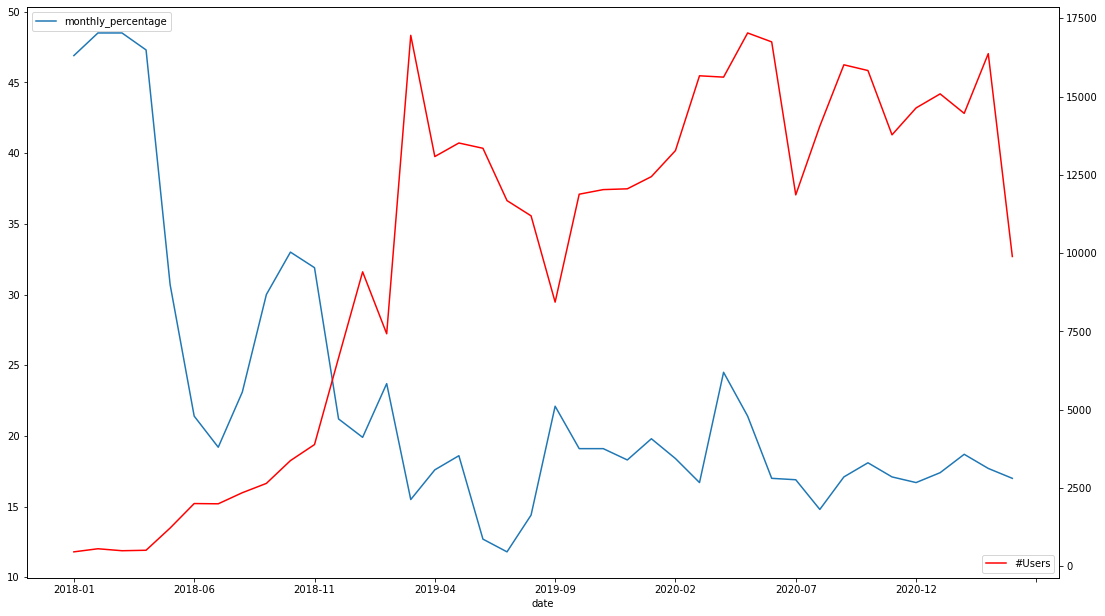

In [49]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
fig.set_size_inches(18.5, 10.5)
df.plot(x= "date", y= "monthly_percentage", ax=ax)
df_distinct.plot(x="date", y= "#Users" , ax=ax2, color = "red")

ax.legend(loc='upper left')
ax2.legend(loc='lower right')
plt.show()